In [32]:
import pandas as pd
import numpy as np

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df = pd.read_csv('911.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 16.2+ MB


In [36]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

#### What are the top 5 zipcodes for 911 calls ?

In [37]:
df['zip'].value_counts().head()

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

#### What are the top 5 townships (twp) for 911 calls ?

In [38]:
df['twp'].value_counts().head()

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

#### How many unique title codes at the 'title' column ? 

In [39]:
df['title'].nunique()

133

## Creating new features

create a column that takes the first annotation part from the 'title' column (EMS:/Fire:/...) and isolates it

In [40]:
x = df['title'].iloc[0]

In [41]:
x

'EMS: BACK PAINS/INJURY'

In [42]:
x.split(':')

['EMS', ' BACK PAINS/INJURY']

In [43]:
x.split(':')[0]

'EMS'

In [44]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [45]:
df['reason'].head(20)

0         EMS
1         EMS
2        Fire
3         EMS
4         EMS
5         EMS
6         EMS
7         EMS
8         EMS
9     Traffic
10    Traffic
11    Traffic
12    Traffic
13    Traffic
14    Traffic
15    Traffic
16        EMS
17        EMS
18        EMS
19    Traffic
Name: reason, dtype: object

#### What is the most common reason for a 911 call ? 

In [46]:
df['reason'].value_counts()

EMS        161441
Traffic    116065
Fire        48919
Name: reason, dtype: int64

#### Use seaborn to create a countplot of 911 by 'reason' ?

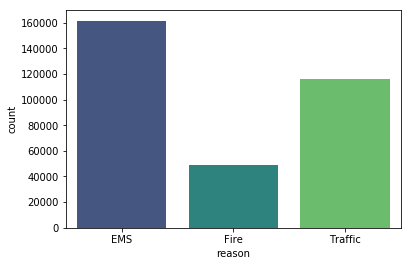

In [47]:
sns.countplot(x='reason',data=df,palette='viridis')

#### What is the data type of the objects in the timestamp column ? 

In [48]:
type(df['timeStamp'].iloc[0])

str

#### Change timeStamp into datetime 

In [49]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [50]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

#### Create 3 new columns (Hour, Month, Day of Week)

In [51]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [52]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [53]:
df['month'] = df['timeStamp'].apply(lambda time: time.month)

In [54]:
df['day'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [55]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3


#### Map the 'dayofweek' number format with its string equivalent

In [56]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [57]:
df['day'] = df['day'].map(dmap)

In [58]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu


#### Plotting the day of week with seaborn countplot

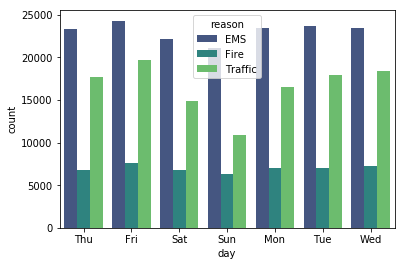

In [59]:
sns.countplot(data=df,x='day',hue='reason',palette='viridis')

#### Same for the months

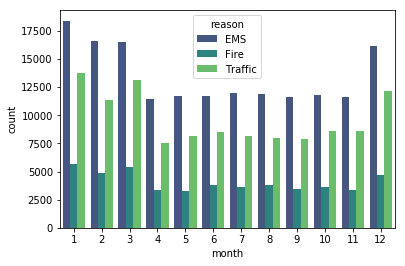

In [60]:
sns.countplot(data=df,x='month',hue='reason',palette='viridis')

#### Create a groupby object called 'byMonth' to group columns by Months

In [61]:
byMonth = df.groupby('month')
byMonth.count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day
month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,34987,34987,34987,31070,34987,34987,34973,34987,34987,34987,34987,34987
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093


#### Plot the count of 'calls' per month

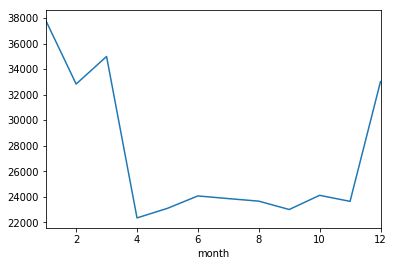

In [64]:
byMonth['lat'].count().plot()

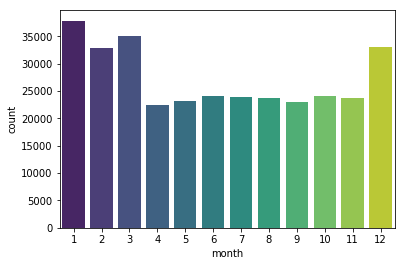

In [65]:
sns.countplot(x='month',data=df,palette='viridis')

#### create a linear fit with lmplot() to fit the number of calls per month

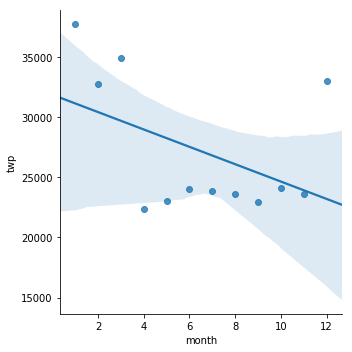

In [68]:
sns.lmplot(x='month',y='twp',data=byMonth.count().reset_index())

#### Create a column 'date' containing the date from the timestamp (to keep only the date)

In [69]:
t = df['timeStamp'].iloc[0]
t

Timestamp('2015-12-10 17:10:52')

In [70]:
df['date'] = df['timeStamp'].apply(lambda t : t.date())

In [71]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


#### Group by date column and agg() with count. plot by 'lat'

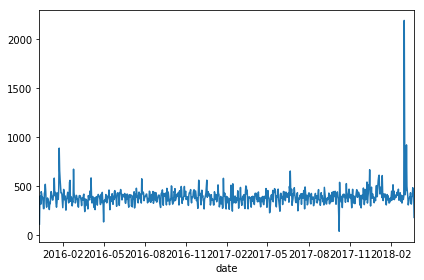

In [78]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout() # more space for the overlapping data)

#### Recreate the plots for each reason

- EMS

<function matplotlib.pyplot.tight_layout>

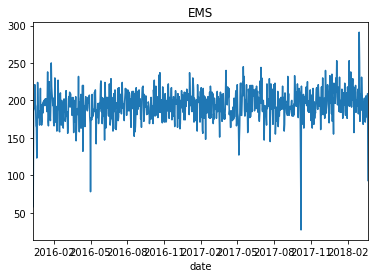

In [79]:
df[df['reason'] == 'EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout

- Fire

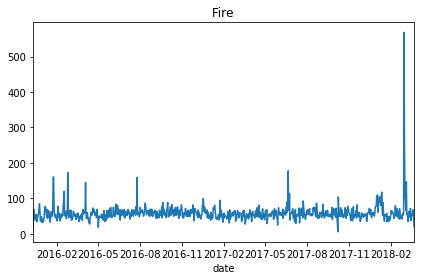

In [81]:
df[df['reason'] == 'Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

- Traffic

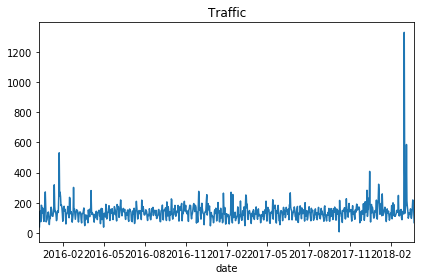

In [82]:
df[df['reason'] == 'Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

#### Heatmap of datas by day of week and Hour

In [89]:
dayHour = df.groupby(by=['day','hour']).count()['reason'].unstack()
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,896,789,701,644,633,786,1286,2087,2487,2570,...,3290,3562,3726,3596,2858,2562,2205,1916,1765,1396
Mon,931,732,663,585,683,862,1291,2175,2714,2766,...,2729,3034,3082,3116,2729,2179,1912,1503,1303,1003
Sat,1130,999,908,767,742,788,957,1295,1674,2132,...,2643,2563,2529,2525,2477,2320,2074,1839,1579,1469
Sun,1159,1026,955,800,717,736,880,1196,1492,1849,...,2276,2170,2200,2234,2179,2067,1753,1536,1235,1177
Thu,871,690,727,603,573,833,1386,2254,2613,2719,...,2863,3044,3017,3335,2707,2226,1974,1724,1360,1120
Tue,842,698,625,598,634,858,1386,2269,2853,2764,...,2937,3149,3335,3286,2918,2283,1960,1660,1329,1025
Wed,805,738,620,626,560,798,1382,2319,2751,2744,...,3095,3211,3413,3435,2782,2296,2064,1682,1422,1103


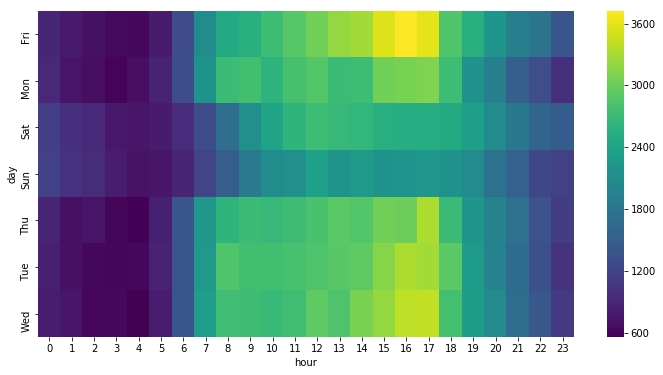

In [92]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

#### Creating a Clustermap

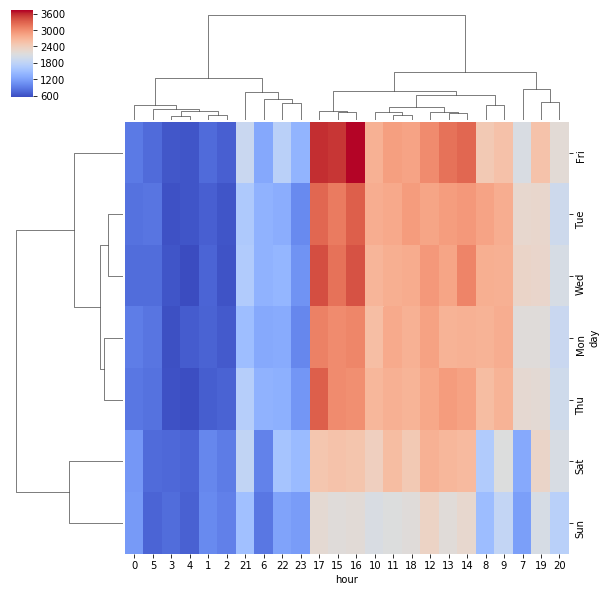

In [99]:
sns.clustermap(dayHour,cmap='coolwarm')

#### Heatmap of datas by day of week and Month

In [95]:
dayMonth = df.groupby(by=['day','month']).count()['reason'].unstack()
dayMonth

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
Fri,5532,4848,7005,3574,3278,3747,3736,3297,4226,3433,3377,5570
Mon,5716,5214,4313,3088,3538,3264,3687,3325,3031,4250,3262,4286
Sat,5103,4431,4355,3490,2764,3024,3515,2810,3144,3042,2972,5200
Sun,4882,3806,3268,3026,2580,2679,3259,2658,2565,3172,2592,3896
Thu,4985,4708,5601,3097,3289,4095,3248,3507,3702,3189,3478,4899
Tue,6118,4755,4752,3065,3991,3376,3213,4044,3142,3689,3891,4691
Wed,5488,5066,5693,3003,3653,3880,3198,4016,3191,3338,4067,4477


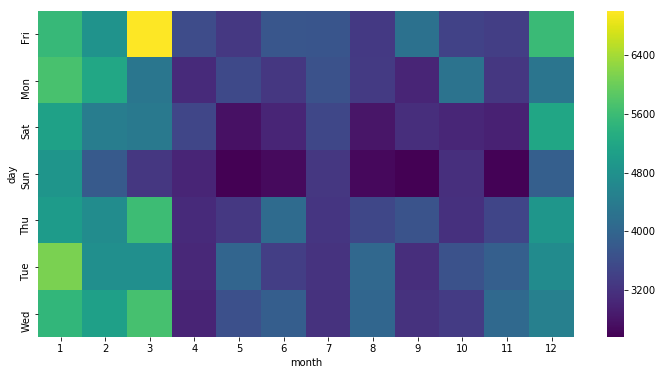

In [97]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

#### Creating a Clustermap

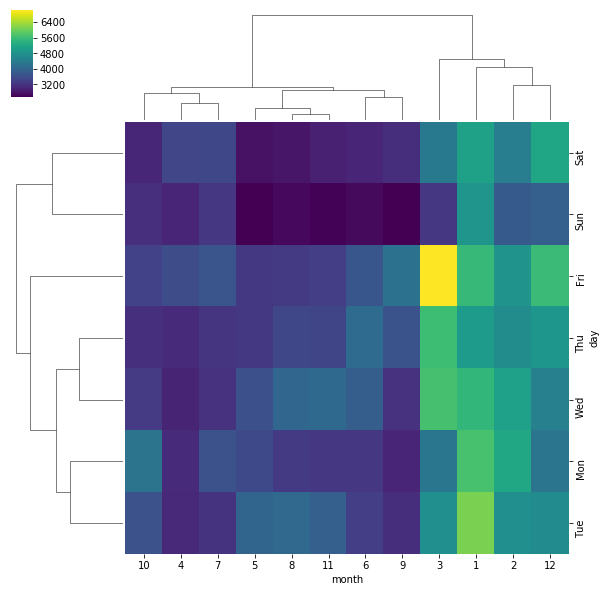

In [98]:
sns.clustermap(dayMonth,cmap='viridis')